# Level 1 Contiguity

### Mexico level 2 - municipalities & US counties

In [1]:
import geoplanar
import geopandas as gpd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = gpd.read_parquet("../geoplanar/datasets/usmex/usmex_1.parquet")
df

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
2,2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,46,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.47_1,Virginia,VA,None,State,State,None,US.VA
77,47,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.48_1,Washington,WA|Wash.,None,State,State,None,US.WA
78,48,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.49_1,West Virginia,WV|W.Va.,None,State,State,None,US.WV
79,49,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.50_1,Wisconsin,WI|Wis.,None,State,State,None,US.WI


In [3]:
df.shape

(81, 25)

In [4]:
df2 = gpd.read_parquet("../geoplanar/datasets/usmex/final_usmex1.parquet")
df2

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
2,2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,46,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.47_1,Virginia,VA,None,State,State,None,US.VA
77,47,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.48_1,Washington,WA|Wash.,None,State,State,None,US.WA
78,48,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.49_1,West Virginia,WV|W.Va.,None,State,State,None,US.WV
79,49,None,None,None,None,None,None,None,None,None,...,USA,United States,USA.50_1,Wisconsin,WI|Wis.,None,State,State,None,US.WI


# Checking for contiguity

In [5]:
import libpysal
from libpysal.weights import Queen, Rook
import pandas

## Rook contiguity

In [6]:
w_rook = Rook.from_dataframe(df)

In [7]:
w_rook.n

81

In [8]:
# non-zero entries
w_rook.nonzero

354

In [9]:
# number of joins
w_rook.s0

354.0

In [10]:
# measure of the density of the spatial weights matrix
w_rook.pct_nonzero

5.3955189757658895

In [11]:
# location 0 has the following neighbors
w_rook.neighbors[0] 

[13, 31]

In [12]:
# neighbors for each observation
w_rook.neighbors

{0: [13, 31],
 1: [25, 2],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [24, 9, 6, 25],
 6: [9, 18, 5, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 31, 15],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [27, 31, 6, 23],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [24, 1, 5],
 26: [3, 4, 29],
 27: [18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [74, 35, 58, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [33, 58, 67],
 36: [80, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 42: [80, 67, 58, 56, 74, 77],
 43: [47, 52, 55, 44, 45,

In [13]:
# full neighbor matrix
pandas.DataFrame(*w_rook.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# weight values
w_rook.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0],
 36

In [15]:
# number of neighbors for each observation
w_rook.cardinalities

{0: 2,
 1: 2,
 2: 1,
 3: 3,
 4: 3,
 5: 4,
 6: 4,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 4,
 34: 6,
 35: 3,
 36: 6,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 4,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 4,
 74: 5,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [16]:
# overview of the distribution of these cardinalities
w_rook.histogram

[(1, 2), (2, 11), (3, 14), (4, 18), (5, 12), (6, 16), (7, 4), (8, 4)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

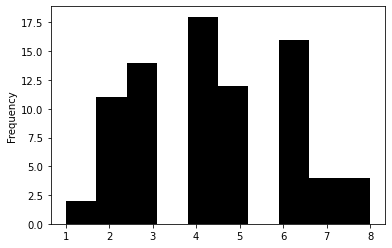

In [17]:
pandas.Series(w_rook.cardinalities).plot.hist(color='k');

In [18]:
w_rook.s0


354.0

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

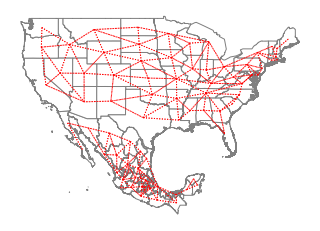

In [20]:
ax = df.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(df, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

## Queen contiguity

In [21]:
w_queen = Queen.from_dataframe(df)

In [22]:
w_queen.n

81

In [23]:
w_queen.n == w_rook.n

True

In [24]:
# non-zero entries
w_queen.nonzero

358

In [25]:
# number of joins
w_queen.s0

358.0

In [26]:
# measure of the density of the spatial weights matrix
w_queen.pct_nonzero

5.4564852918762385

In [27]:
# location 0 has the following neighbors
w_queen.neighbors[0]

[13, 31]

In [28]:
# neighbors for each observation
w_queen.neighbors

{0: [13, 31],
 1: [25, 2],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [24, 9, 6, 25],
 6: [9, 18, 5, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 15, 31],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [27, 31, 6, 23],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [24, 1, 5],
 26: [3, 4, 29],
 27: [18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [35, 36, 58, 74, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [33, 58, 67],
 36: [80, 33, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 42: [80, 67, 58, 56, 74, 77],
 43: [47, 52, 55,

In [29]:
# full neighbor matrix
pandas.DataFrame(*w_queen.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# weight values
w_queen.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0]

In [31]:
# number of neighbors for each observation
w_queen.cardinalities

{0: 2,
 1: 2,
 2: 1,
 3: 3,
 4: 3,
 5: 4,
 6: 4,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 5,
 34: 6,
 35: 3,
 36: 7,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 5,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 4,
 74: 6,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [32]:
# overview of the distribution of these cardinalities
w_queen.histogram

[(1, 2), (2, 11), (3, 14), (4, 16), (5, 13), (6, 16), (7, 5), (8, 4)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

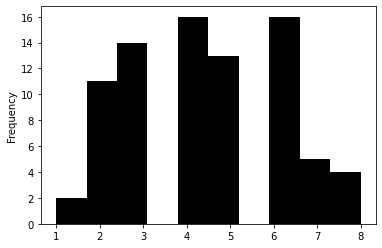

In [33]:
pandas.Series(w_queen.cardinalities).plot.hist(color='k');

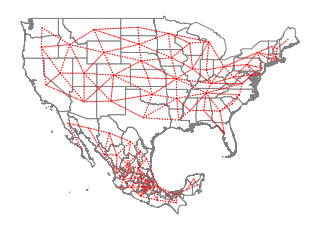

In [34]:
ax = df.plot(edgecolor='grey', facecolor='w')
f,ax = w_queen.plot(df, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

## Contiguity with clean us/mex border file

## Rook contiguity

In [35]:
wr = Rook.from_dataframe(df2)

In [36]:
wr.n

81

In [37]:
# non-zero entries
wr.nonzero

372

In [38]:
# number of joins
wr.s0

372.0

In [39]:
# measure of the density of the spatial weights matrix
wr.pct_nonzero

5.66986739826246

In [40]:
# location 0 has the following neighbors
wr.neighbors[0] 

[13, 31]

In [41]:
# neighbors for each observation
wr.neighbors

{0: [13, 31],
 1: [33, 2, 35, 25],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [73, 6, 24, 9, 61, 25],
 6: [18, 5, 73, 9, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 31, 15],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [6, 23, 73, 27, 31],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [1, 33, 5, 24, 61],
 26: [3, 4, 29],
 27: [73, 18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [1, 35, 74, 25, 58, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [1, 58, 67, 33],
 36: [80, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 42: [80, 

In [42]:
# full neighbor matrix
pandas.DataFrame(*wr.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# weight values
wr.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1

In [44]:
# number of neighbors for each observation
wr.cardinalities

{0: 2,
 1: 4,
 2: 1,
 3: 3,
 4: 3,
 5: 6,
 6: 5,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 5,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 5,
 26: 3,
 27: 4,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 6,
 34: 6,
 35: 4,
 36: 6,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 6,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 8,
 74: 5,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [45]:
# overview of the distribution of these cardinalities
wr.histogram

[(1, 2), (2, 10), (3, 11), (4, 15), (5, 15), (6, 19), (7, 4), (8, 5)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

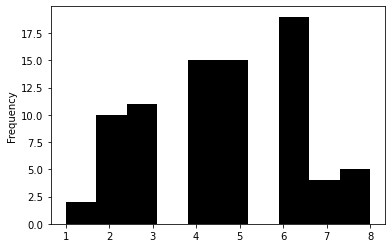

In [46]:
pandas.Series(wr.cardinalities).plot.hist(color='k');

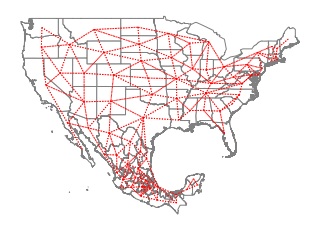

In [62]:
ax = df2.plot(edgecolor='grey', facecolor='w')
f,ax = wr.plot(df2, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

## Queen contigutiy

In [48]:
wq = Queen.from_dataframe(df2)

In [49]:
wq.n

81

In [50]:
wq.n == wr.n

True

In [51]:
# non-zero entries
wq.nonzero

376

In [52]:
# number of joins
wq.s0

376.0

In [53]:
# measure of the density of the spatial weights matrix
wq.pct_nonzero

5.730833714372809

In [54]:
# location 0 has the following neighbors
wq.neighbors[0] 

[13, 31]

In [55]:
# neighbors for each observation
wq.neighbors

{0: [13, 31],
 1: [33, 2, 35, 25],
 2: [1],
 3: [26, 22, 30],
 4: [26, 19, 29],
 5: [6, 9, 24, 73, 61, 25],
 6: [18, 5, 73, 9, 31],
 7: [13, 15],
 8: [16, 14],
 9: [17, 5, 6, 24, 31],
 10: [21, 23, 15, 13, 31],
 11: [16, 19, 20, 14, 15],
 12: [20, 21, 23, 28, 29, 14],
 13: [0, 17, 7, 10, 15, 31],
 14: [8, 11, 12, 15, 16, 20, 21, 28],
 15: [21, 7, 10, 11, 13, 14],
 16: [8, 11, 20, 14],
 17: [24, 9, 13, 31],
 18: [6, 23, 73, 27, 31],
 19: [29, 11, 4, 20],
 20: [16, 29, 19, 11, 12, 28, 14],
 21: [23, 10, 12, 14, 15],
 22: [3, 30],
 23: [18, 21, 10, 27, 12, 29, 31],
 24: [17, 5, 9, 25],
 25: [1, 33, 5, 24, 61],
 26: [3, 4, 29],
 27: [73, 18, 29, 23],
 28: [20, 12, 14],
 29: [19, 4, 20, 23, 26, 27, 12],
 30: [3, 22],
 31: [0, 6, 9, 10, 13, 17, 18, 23],
 32: [72, 41, 40, 54],
 33: [1, 35, 36, 58, 25, 74, 61],
 34: [48, 66, 54, 55, 72, 73],
 35: [1, 58, 67, 33],
 36: [80, 33, 66, 57, 74, 61, 46],
 37: [51, 69, 62],
 38: [50, 68, 60],
 39: [50, 76],
 40: [32, 41],
 41: [32, 70, 40, 72, 63],
 4

In [56]:
# full neighbor matrix
pandas.DataFrame(*wq.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# weight values
wq.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 3

In [58]:
# number of neighbors for each observation
wq.cardinalities

{0: 2,
 1: 4,
 2: 1,
 3: 3,
 4: 3,
 5: 6,
 6: 5,
 7: 2,
 8: 2,
 9: 5,
 10: 5,
 11: 5,
 12: 6,
 13: 6,
 14: 8,
 15: 6,
 16: 4,
 17: 4,
 18: 5,
 19: 4,
 20: 7,
 21: 5,
 22: 2,
 23: 7,
 24: 4,
 25: 5,
 26: 3,
 27: 4,
 28: 3,
 29: 7,
 30: 2,
 31: 8,
 32: 4,
 33: 7,
 34: 6,
 35: 4,
 36: 7,
 37: 3,
 38: 3,
 39: 2,
 40: 2,
 41: 5,
 42: 6,
 43: 6,
 44: 4,
 45: 6,
 46: 4,
 47: 7,
 48: 3,
 49: 1,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 4,
 55: 8,
 56: 4,
 57: 6,
 58: 5,
 59: 3,
 60: 3,
 61: 7,
 62: 6,
 63: 4,
 64: 3,
 65: 6,
 66: 6,
 67: 4,
 68: 6,
 69: 2,
 70: 2,
 71: 6,
 72: 8,
 73: 8,
 74: 6,
 75: 3,
 76: 6,
 77: 2,
 78: 5,
 79: 4,
 80: 6}

In [59]:
# overview of the distribution of these cardinalities
wq.histogram

[(1, 2), (2, 10), (3, 11), (4, 15), (5, 14), (6, 17), (7, 7), (8, 5)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

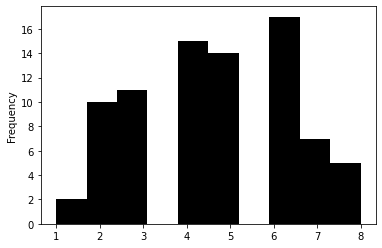

In [60]:
pandas.Series(wq.cardinalities).plot.hist(color='k');

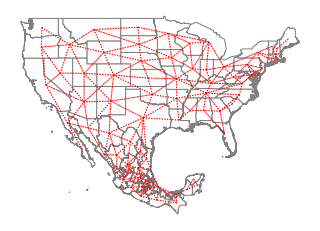

In [61]:
ax = df2.plot(edgecolor='grey', facecolor='w')
f,ax = wq.plot(df2, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

(-127.6534736675, -64.0581962625, 12.792663105600067, 51.1257081064)

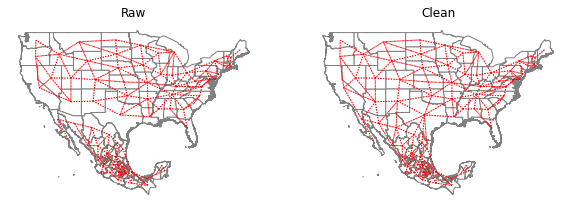

In [64]:
f,ax = plt.subplots(1,2,figsize=(10, 6), subplot_kw=dict(aspect='equal'))
df.plot(edgecolor='grey', facecolor='w', ax=ax[0])
w_rook.plot(df, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Raw')

ax[0].axis('off')
df2.plot(edgecolor='grey', facecolor='w', ax=ax[1])
wr.plot(df2, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Clean')
ax[1].axis('off')

(-127.6534736675, -64.0581962625, 12.792663105600067, 51.1257081064)

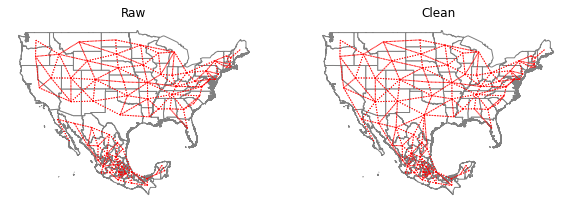

In [65]:
f,ax = plt.subplots(1,2,figsize=(10, 6), subplot_kw=dict(aspect='equal'))
df.plot(edgecolor='grey', facecolor='w', ax=ax[0])
w_queen.plot(df, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Raw')

ax[0].axis('off')
df2.plot(edgecolor='grey', facecolor='w', ax=ax[1])
wq.plot(df2, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Clean')
ax[1].axis('off')